In [2]:
# import multi tracker analysis
import multi_tracker_analysis as mta

In [35]:
# load hdf5 data as a pandas dataframe, and load the configuration
# change the argument to match your data path!
pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/home/caveman/demo/demo_1/test_data/')

File is not a trackedobjects file, looking for a trackedobjects file in this directory
Found:  /home/caveman/demo/demo_1/test_data/20160531_160855_N1_trackedobjects.hdf5
Preprocessing data - see config file for details!
No delete cut join instructions found in path!


In [18]:
# pandas dataframe structure: each row is a measurement corresponding to one of the objects for each frame
pd.keys()

Index([u'angle', u'area', u'frames', u'measurement_x', u'measurement_y',
       u'objid', u'position_x', u'position_y', u'time_epoch_nsecs',
       u'time_epoch_secs', u'velocity_x', u'velocity_y', u'time_epoch',
       u'speed'],
      dtype='object')

In [20]:
# show the object id's
import numpy as np
np.unique(pd.objid)

array([ 0,  1,  2,  3,  6,  7,  9, 10, 11, 12, 22, 23, 25])

In [32]:
position_for_10 = pd[pd.objid==10].position_x.values
position_for_10

array([ 460.        ,  460.        ,  460.        ,  460.        ,
        460.        ,  460.        ,  460.        ,  459.59732957,
        459.32276829,  458.780908  ,  458.05604803,  457.19996275,
        456.24708056,  455.22269337,  453.84097436,  452.4836458 ,
        450.85526968,  449.0175411 ,  447.3278121 ,  445.47370204,
        444.40825339,  443.69783843,  443.27223568,  443.06735073,
        443.33076778,  443.6550623 ,  444.00456115,  444.35314175,
        444.98653475,  445.53370638,  445.68817924,  446.11598315,
        446.46046274,  446.42495643,  446.37781251,  446.02125322,
        445.71912437,  445.47083336,  444.96932584,  444.26522295,
        443.70825987,  442.97932574,  441.81255981,  440.60080664,
        439.36890793,  438.13522151,  436.60882113,  435.15744252,
        433.78211372,  432.47953723,  431.85118054,  431.77814509,
        431.84454775,  432.30832412,  432.77324752,  433.21443494,
        433.00821302,  432.56040696,  431.91527039,  431.41782

In [33]:
# wrap pandas dataframe into a dataset object for intuitive processing
# note: using copy=True creates a copy of the data
#       this allows you to add attributes to trajecties and pickle the dataset structure for future use
dataset = mta.read_hdf5_file_to_pandas.Dataset(pd, config=config)
dataset.load_keys() # load the object ids
trajec = dataset.trajec(dataset.keys[7]) # load the 7th trajectory
trajec.position_x # show the position x data

array([ 460.        ,  460.        ,  460.        ,  460.        ,
        460.        ,  460.        ,  460.        ,  459.59732957,
        459.32276829,  458.780908  ,  458.05604803,  457.19996275,
        456.24708056,  455.22269337,  453.84097436,  452.4836458 ,
        450.85526968,  449.0175411 ,  447.3278121 ,  445.47370204,
        444.40825339,  443.69783843,  443.27223568,  443.06735073,
        443.33076778,  443.6550623 ,  444.00456115,  444.35314175,
        444.98653475,  445.53370638,  445.68817924,  446.11598315,
        446.46046274,  446.42495643,  446.37781251,  446.02125322,
        445.71912437,  445.47083336,  444.96932584,  444.26522295,
        443.70825987,  442.97932574,  441.81255981,  440.60080664,
        439.36890793,  438.13522151,  436.60882113,  435.15744252,
        433.78211372,  432.47953723,  431.85118054,  431.77814509,
        431.84454775,  432.30832412,  432.77324752,  433.21443494,
        433.00821302,  432.56040696,  431.91527039,  431.41782

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

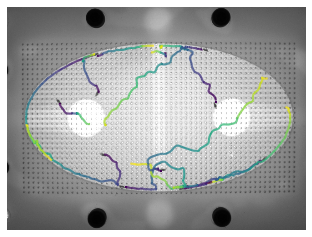

In [15]:
# plot the trajectory; this requires downloading my plotting library: https://github.com/florisvb/FlyPlotLib
mta.plot.plot_trajectories(dataset, dataset.keys)

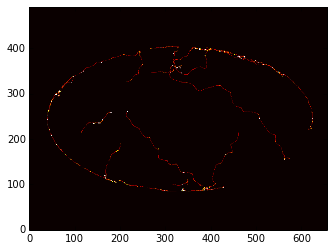

In [14]:
# make a heatmap of the trajectories
bgimg = mta.plot.get_filename(config.path, 'bgimg')
binsx, binsy = mta.plot.get_bins_from_backgroundimage(bgimg)
mta.plot.plot_heatmap(pd, binsx, binsy)